In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [246]:
df = pd.read_csv('/content/Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [247]:
X = df['YearsExperience']
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [249]:
Y=df['Salary']
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

# Initialization

In [250]:
m = len(Y)

In [251]:
Y=np.array(Y)
Y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [252]:
theta = np.array([0.5,0.5])
theta.shape

(2,)

In [253]:
featv = np.array([[1 for i in range(len(X))],list(X)])
print(featv.shape)
featv[1]

(2, 30)


array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [254]:
hypf = theta.reshape(-1,2).dot(featv)
print(hypf)
hypf.shape

[[1.05 1.15 1.25 1.5  1.6  1.95 2.   2.1  2.1  2.35 2.45 2.5  2.5  2.55
  2.75 2.95 3.05 3.15 3.45 3.5  3.9  4.05 4.45 4.6  4.85 5.   5.25 5.3
  5.65 5.75]]


(1, 30)

In [255]:
cf = np.sum((hypf-Y)**2)/(2*m)

In [256]:
a = 0.03

In [257]:
m = len(Y)
def GD(theta,featv,Y):
  iter = 1000
  for j in range(iter):
    temp=[]
    hypf = theta.reshape(-1,2).dot(featv)
    cf = np.sum((hypf-Y)**2)/(2*m)
    for i in range(len(theta)):
      temp = np.append(temp, theta[i] - (a/m)*np.sum((hypf-Y)*featv[i]))
    theta = temp[:]
    hypf = theta.reshape(-1,2).dot(featv)
    cf = np.sum((hypf-Y)**2)/(2*m)
    print(cf)
  return theta,hypf

# Execution


In [258]:
theta,hypf = GD(theta,featv,Y)

110845035.39529033
76017630.6322499
74888982.05105092
74135400.45574035
73395266.40516241
72664538.35717644
71943055.31749931
71230699.87058036
70527356.5369625
69832911.30302475
69147251.5976024
68470266.27368549
67801845.59040125
67141881.19522476
66490266.10641487
65846894.695672005
65211662.671015754
64584467.05987888
63965206.19241521
63353779.685018584
62750088.42405071
62154034.54977445
61565521.44049045
60984453.69687475
60410737.1265142
59844278.7286377
59284986.67904053
58732770.315199375
58187540.12157597
57649207.71510611
57117685.8308728
56592888.307960205
56074730.07548699
55563127.138815925
55057996.56593827
54559256.474030346
54066826.01618006
53580625.36828145
53100575.71609501
52626599.24247176
52158619.1147389
51696559.47224502
51240345.41406301
50789902.986848235
50345159.17285075
49906041.87807892
49472479.92061272
49044403.01906504
48621741.78118892
48204427.69262878
47792393.10581445
47385571.2289949
46983896.115411356
46587302.65260725
46195726.55187312
45809104

In [259]:
print(theta)

[25751.1745997   9456.05034859]


In [260]:
print(hypf)

[[ 36152.82998314  38044.04005286  39935.25012257  44663.27529687
   46554.48536658  53173.72061059  54119.32564545  56010.53571517
   56010.53571517  60738.56088946  62629.77095918  63575.37599404
   63575.37599404  64520.9810289   68303.40116833  72085.82130777
   73977.03137748  75868.2414472   81541.87165635  82487.47669121
   90052.31697008  92889.13207465 100453.97235352 103290.7874581
  108018.81263239 110855.62773697 115583.65291126 116529.25794612
  123148.49319013 125039.70325985]]


In [261]:
print(Y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


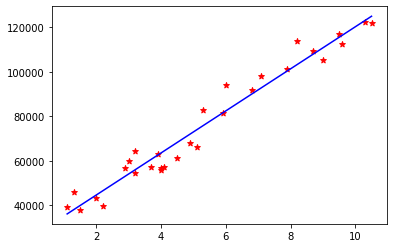

In [262]:
plt.scatter(X,Y,color='red',marker='*')
plt.plot(X,hypf.reshape(30,1),color='blue')
plt.show()

In [265]:
x=df.drop('Salary',1)
model = LinearRegression()
model.fit(x,Y)

LinearRegression()

In [266]:
model.intercept_

25792.200198668696

In [267]:
print(model.coef_)
type(model.coef_)

[9449.96232146]


numpy.ndarray

In [269]:
model.score(x,Y)

0.9569566641435086

In [270]:
model.intercept_ = theta[0]
model.coef_ = np.array([theta[1]])
print(model.intercept_)
print(model.coef_)

25751.174599695078
[9456.05034859]


In [271]:
model.score(x,Y)

0.9569561633099488

In [ ]:
"""
def fit(X,Y):
  m = len(Y)
  Y=np.array(Y)
  featv = np.array([[1 for i in range(len(X))],list(X)])
  theta = np.array([0.5,0.5])
  hypf = theta.reshape(-1,2).dot(featv)
  cf = np.sum((hypf-Y)**2)/(2*m)
  a = 0.03
  theta,hypf = GD(theta,featv,Y)
  return theta,hypf

def GD(theta,featv,Y):
  iter = 1000
  for j in range(iter):
    temp=[]
    hypf = theta.reshape(-1,2).dot(featv)
    cf = np.sum((hypf-Y)**2)/(2*m)
    for i in range(len(theta)):
      temp = np.append(temp, theta[i] - (a/m)*np.sum((hypf-Y)*featv[i]))
    theta = temp[:]
    hypf = theta.reshape(-1,2).dot(featv)
    cf = np.sum((hypf-Y)**2)/(2*m)
  return theta,hypf
"""